In [1]:
%matplotlib inline

# PYTORCH:OPTIM

同样的任务，这次我们学习使用optim包中定义好的优化器,它能帮助我们更新神经网络的权重，这样我们就不必手动去更新这些参数了。optim包定义了许多优化算法，包括SGD+momentum，RMSProp，Adam等等。

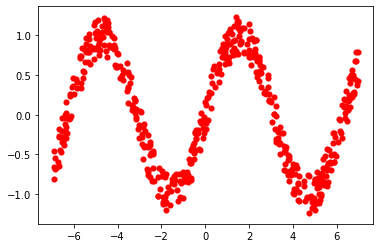

In [2]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

# N是batch_size； D_in是输入的维度
# H是隐层的维度；D_out是输出的维度
N, D_in, H, D_out = 512, 1, 100, 1

#创建数据集，y通过sin函数计算并加上部分噪声
x = np.random.rand(N, D_in)
x = (x - 0.5) * 14
y = np.sin(x) + (np.random.rand(N, D_out) - 0.5) * 0.5
plt.scatter(x,y,color="red", linewidth=0.1)
x = torch.from_numpy(x).type(dtype).to(device)
y = torch.from_numpy(y).type(dtype).to(device)

In [11]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
).to(device)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [12]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(50000):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    if epoch % 1000 == 0:
        print("epoch:",epoch, "loss:", loss.item())
        
    optimizer.zero_grad()
    loss.backward()
        
    optimizer.step()

epoch: 0 loss: 2.0448355674743652
epoch: 1000 loss: 0.38429123163223267
epoch: 2000 loss: 0.3132331371307373
epoch: 3000 loss: 0.25897470116615295
epoch: 4000 loss: 0.20596230030059814
epoch: 5000 loss: 0.15360978245735168
epoch: 6000 loss: 0.10685593634843826
epoch: 7000 loss: 0.06915504485368729
epoch: 8000 loss: 0.043288931250572205
epoch: 9000 loss: 0.02941237762570381
epoch: 10000 loss: 0.0235438235104084
epoch: 11000 loss: 0.021134287118911743
epoch: 12000 loss: 0.020432155579328537
epoch: 13000 loss: 0.019820690155029297
epoch: 14000 loss: 0.01956718973815441
epoch: 15000 loss: 0.0195118710398674
epoch: 16000 loss: 0.01946708746254444
epoch: 17000 loss: 0.01943058706820011
epoch: 18000 loss: 0.01940140500664711
epoch: 19000 loss: 0.019377045333385468
epoch: 20000 loss: 0.019356127828359604
epoch: 21000 loss: 0.019338030368089676
epoch: 22000 loss: 0.019322145730257034
epoch: 23000 loss: 0.019307943060994148
epoch: 24000 loss: 0.01929580792784691
epoch: 25000 loss: 0.019284050911

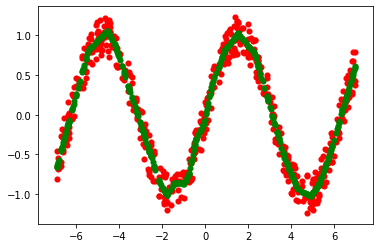

In [9]:
y_pred = model(x)
plt.scatter(x.detach().cpu().numpy(),y.detach().cpu().numpy(),color="red", linewidth=0.1)
plt.scatter(x.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), color='green', linewidth=0.1)

In [10]:
torch.nn.MSELoss?